# STOR 120: Take Home Midterm 1

60 points total

**Due:** Wednesday, February 9th to Gradescope before the start of class time.

    Section 001: 12:20pm
    Section 002:  1:25pm
  
**Directions:** The exam is open book, notes, course materials, internet, and all things that are not direct communication with others. Just as with all course assignments, you will submit exams to Gradescope as Jupyter Notebooks with the ipynb file extension. To receive full credit, you should show all of your code used to answer each question. Make sure to view your submission in Gradescope and verify that it is the correct file and has the format that you intended it to have, including all code being shown and run.

Come to office hours if you have specific questions regarding the exam. Due to the large class sizes, individual questions sent via email are not possible to answer for all students. Please refrain from posting public questions to Piazza before the exam is due.  

**Data:** The dataset used on this exam contains an overview of the 50 most crowded airports in the world for each year from 2016 to 2020. Each row in the table is an airport in the given year with the following atttributes:

Variable   | Description
-----------|---------------------------------------------------------------
Rank       | Airport ranking by number of passengers for given year
Airport    | Name of the airport
Location   | Location of the airport
Country    | Airport Country
IATA Code  | Three-letter code designating the airport defined by the International Air Transport Association
ICAO Code  | Four-letter code designating the airport as defined by the International Civil Aviation Organization
Passengers | Total number of passengers for the given year
Year       | Year of ranking

**Run the cell below to import the needed modules and dataset.**

In [163]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)

Airports = Table.read_table('Airports.csv')
Airports

Rank,Airport,Location,Country,IATA Code,ICAO Code,Passengers,Year
1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN,ZGGG,43760427,2020
2,United States Hartsfield–Jackson Atlanta International A ...,"Atlanta, Georgia",United States,ATL,KATL,42918685,2020
3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU,ZUUU,40741509,2020
4,United States Dallas/Fort Worth International Airport,"Dallas-Fort Worth, Texas",United States,DFW,KDFW,39364990,2020
5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX,ZGSZ,37916059,2020
6,China Chongqing Jiangbei International Airport,"Yubei, Chongqing",China,CKG,ZUCK,34937789,2020
7,China Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK,ZBAA,34513827,2020
8,United States Denver International Airport,"Denver, Colorado",United States,DEN,KDEN,33741129,2020
9,China Kunming Changshui International Airport,"Guandu, Kunming, Yunnan",China,KMG,ZPPP,32989127,2020
10,China Shanghai Hongqiao International Airport,"Changning-Minhang, Shanghai",China,SHA,ZSSS,31165641,2020


### Question 1.1 *(4 pts)*

What is the total number of passengers in the top 50 most crowded airports in 2020? Assign `tot_pass_2020` to this value.

In [14]:
#The data is given for 50 airports so choosing data for 2020
tot_pass_2020 = sum (Airports["Passengers"][Airports["Year"]==2020])
tot_pass_2020

1223369322

In [38]:
Airports["Airport"][Airports["Passengers"] == Airports["Passengers"].max()]

array(['United States\xa0Hartsfield–Jackson Atlanta International Airport'],
      dtype='<U62')

### Question 1.2 *(4 pts)*

What are the names of the airports with the largest number of passengers in each of the years? Assign `busiest_airports` to an array containing the names of these airports (possibly with repeated names of the same airport), in descending order of their passenger totals.

Note: You may see **\xa0** in the strings for the names of the airports. This is fine and due to the encoding of the data.

In [238]:
busiest_airports = Airports.group("Year", max).sort('Passengers max', descending = True).select("Airport max")['Airport max']
busiest_airports

array(['United States\xa0Seattle–Tacoma International Airport',
       'United States\xa0Seattle–Tacoma International Airport',
       'United States\xa0Seattle–Tacoma International Airport',
       'United States\xa0Seattle–Tacoma International Airport',
       'Vietnam\xa0Tan Son Nhat International Airport'], dtype='<U50')

### Question 1.3 *(4 pts)*

What is the average number of passengers in the top ranked airports for each of the years? Assign this value to `busiest_airports_average`.

In [248]:
busiest_airport_average = Airports.group("Airport", sum).where('Airport', busiest_airports)['Passengers sum']/5
busiest_airport_average

array([42882232., 42882232., 42882232., 42882232.,  4380000.])

### Question 2.1 *(4 pts)*

Construct a new table `Airports2` that contains each of the rows and columns of the `Airports` table and also contains a new column, `Passengers in Millions`, which is the number of passengers for each airport counted in millions of passengers.  

In [208]:
Airports2 = Airports.copy()
Airports2["Passengers in millions"] = Airports2["Passengers"]/1000000
Airports2

Rank,Airport,Location,Country,IATA Code,ICAO Code,Passengers,Year,Passengers in millions
1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN,ZGGG,43760427,2020,43.7604
2,United States Hartsfield–Jackson Atlanta International A ...,"Atlanta, Georgia",United States,ATL,KATL,42918685,2020,42.9187
3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU,ZUUU,40741509,2020,40.7415
4,United States Dallas/Fort Worth International Airport,"Dallas-Fort Worth, Texas",United States,DFW,KDFW,39364990,2020,39.365
5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX,ZGSZ,37916059,2020,37.9161
6,China Chongqing Jiangbei International Airport,"Yubei, Chongqing",China,CKG,ZUCK,34937789,2020,34.9378
7,China Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK,ZBAA,34513827,2020,34.5138
8,United States Denver International Airport,"Denver, Colorado",United States,DEN,KDEN,33741129,2020,33.7411
9,China Kunming Changshui International Airport,"Guandu, Kunming, Yunnan",China,KMG,ZPPP,32989127,2020,32.9891
10,China Shanghai Hongqiao International Airport,"Changning-Minhang, Shanghai",China,SHA,ZSSS,31165641,2020,31.1656


### Question 2.2 *(4 pts)*

Use the `Airports2` table to construct a histogram for the numbers of passengers in the millions. Construct the histogram such that the bins begin at 10 million passengers, are 10 million passengers wide, and the histogram has bins containing all of the data from the airports in the table.

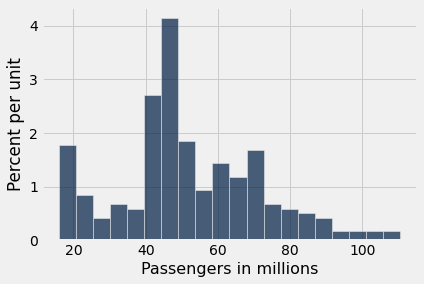

In [47]:
Airports2.hist('Passengers in millions', bins = 20)

### Question 2.3 *(2 pts)*

From the histogram constructed in the previous question, which binning of millions of passengers has the most airports in the data? Set `most_airports_bin` to an array containging two values, the lower and upper limits of that bin.

In [48]:
most_airports_bin = make_array(45, 50)
most_airports_bin

array([45, 50])

### Question 2.4 *(4 pts)*

How many airports are in the bin from the previous question? Assign this value to `num_airports`. Consider each row of the data as a unique airport, even though the same airport may be shown over multiple years. You should calculate this number from the `Airports2` table and not estimate the value from the histogram.

In [62]:
num_airports = len(Airports2["Airport"][(Airports2["Passengers in millions"] >= 45) & (Airports2["Passengers in millions"] <= 50)])
num_airports

39

### Question 3.1 *(8 pts)*

Construct a bar chart showing the number of times each country appears in the top 50 airports for all years in the data. The bar chart should have the country with the highest number of airports at the top, and then the remaining countries in decreasing order.

<BarContainer object of 29 artists>

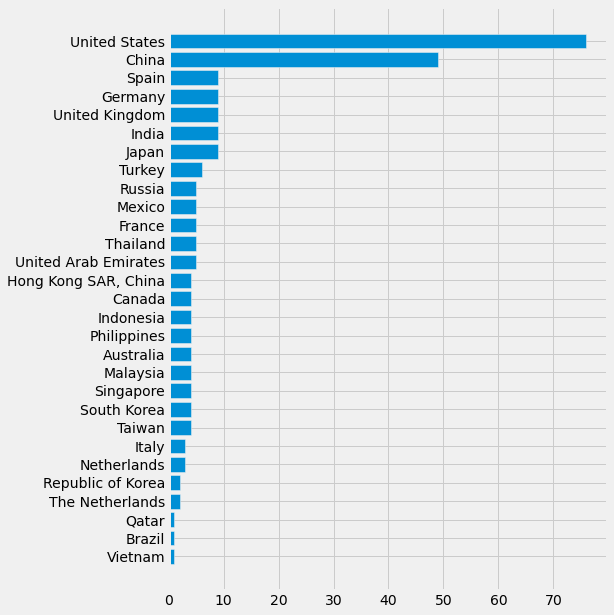

In [131]:
Count, unique_counts = np.unique(Airports["Country"], return_counts=True)
fig = plots.figure(figsize=(7, 10))
import pandas as pd
df = pd.DataFrame({'Name':Count,'Frequency':unique_counts})
df = df.sort_values('Frequency')
plots.barh(df['Name'], df['Frequency'])

### Question 3.2 *(8 pts)*

You should see that China and the United States have many more airports in the data than other countries. Construct a table, `US_China_tot`, using only the airports in the United States and China (over all years) that has five rows, one for each year in the data, and columns for the year (in ascending order), the total number passengers in these airports in China for each year, and the total number passengers in these airports in the United States for each year.

Note: Depending on how you go about this problem, you may receive a **VisibleDeprecationWarning**. This is fine and will not impact your table.

In [224]:
US_China_tot = Airports.where('Country', are.equal_to('United States')).select("Country", "Passengers", "Year").group('Year', sum).join('Year',Airports.where('Country', are.equal_to('China')).select("Country", "Passengers", "Year").group('Year', sum)).drop('Country sum', 'Country sum_2')
US_China_tot

Year,Passengers sum,Passengers sum_2
2016,886062548,390582892
2017,869980194,455506455
2018,904921387,482556514
2019,934865503,544055234
2020,368767320,472211986


### Question 3.3 *(4 pts)*

Using the `US_China_tot` table from the previous question, construct an appropriate plot that shows these totals for passengers over time for each of the two countries.

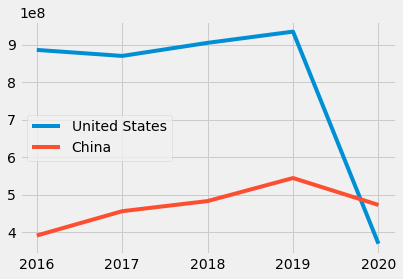

In [225]:
plots.plot(US_China_tot['Year'], US_China_tot['Passengers sum'], label = "United States")
plots.plot(US_China_tot['Year'], US_China_tot['Passengers sum_2'], label = "China")
plots.legend()
plots.show()

### Question 4.1 *(8 pts)*

Write a function, `airport_prop` with arguments for IATA Code, country, and year for a given airport in the data (in that order). The function should return the proportion of passengers in that country's airports (from these top 50 most crowded airports) that went through the specific airport with the given IATA Code in the given year. 

In [200]:
def airport_prop(IATA_Code, Country, Year):
  #Total Number of passengers in the country's airport
  Country_pass = sum(Airports["Passengers"][(Airports["Country"] == Country) & (Airports["Year"] == Year)])
  #Passengers that went through specific airport
  Airport_pass = Airports["Passengers"][(Airports["IATA Code"] == IATA_Code) & (Airports["Year"] == Year)]
  return (float)(Airport_pass / Country_pass)

Run the cell below to check your function.

In [201]:
airport_prop('DFW','United States', 2019)

0.08029706493512576

### Question 4.2 *(6 pts)*

Construct a new table, `Airports_prop_2020` for just the 2020 data. It should have all of the columns of the `Airports` table as well as a new column `Passengers Proportion`, which is the proportion of passengers from a given country's airports (from these top 50 most crowded airports) that went through a given airport in 2020. You should use the apply function and your function created in the previous question to answer this question. Sort the data in the `Airports_prop_2020` table by this new `Passengers Proportion` column in ascending order.

In [202]:
Airports_prop_2020 = Airports.copy()
Airports_prop_2020.append_column('Passengers Proportion', Airports.apply(airport_prop, 'IATA Code', 'Country', 'Year'))
Airports_prop_2020 = Airports_prop_2020.sort("Passengers Proportion", descending = True)
Airports_prop_2020

Rank,Airport,Location,Country,IATA Code,ICAO Code,Passengers,Year,Passengers Proportion
50,Qatar Hamad International Airport,Doha,Qatar,DOH,OTHH,37283987,2016,1
47,Philippines Ninoy Aquino International Airport,"Pasay/Parañaque, Metro Manila",Philippines,MNL,RPLL,39534991,2016,1
44,Mexico Mexico City International Airport,"Venustiano Carranza, Mexico City",Mexico,MEX,MMMX,41410254,2016,1
42,"Italy Rome–Fiumicino International Airport ""Leonardo da ...","Rome-Fiumicino, Lazio",Italy,FCO,LIRF,41738662,2016,1
38,Australia Sydney Kingsford-Smith Airport,"Mascot, Sydney, New South Wales",Australia,SYD,YSSY,41985810,2016,1
36,Taiwan Taiwan Taoyuan International Airport,"Dayuan, Taoyuan",Taiwan,TPE,RCTP,42296322,2016,1
32,Canada Toronto Pearson International Airport,"Mississauga, Ontario",Canada,YYZ,CYYZ,44335198,2016,1
24,Malaysia Kuala Lumpur International Airport,"Sepang, Selangor",Malaysia,KUL,WMKK,52640043,2016,1
22,Indonesia Soekarno–Hatta International Airport,"Benda, Tangerang, Banten",Indonesia,CGK,WIII,54969536,2016,1
20,Thailand Suvarnabhumi Airport,"Bang Phli, Samut Prakan",Thailand,BKK,VTBS,55892428,2016,1
